In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The windrose may be the most suitable representative graph type for such kind of problems, however in scope of several years and seasonal distribution, windroses lose their reliability. That is why bar chart is better to use for tracking dynamic change.

Для решения подобных задач наиболее подходящим репрезентативным типом графика может быть роза ветров, однако в масштабах нескольких лет и сезонного распределения розы ветров теряют свою надежность. Поэтому для отслеживания динамических изменений лучше использовать гистограмму.

In [2]:
data = pd.read_csv("WindDirection.csv")
data["date"] = pd.to_datetime(data["date"], format="%m/%d/%Y")

def get_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    else:
        return "Winter"

In [3]:
data["Season"] = data["date"].dt.month.apply(get_season)
print(data["Season"])

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
6658    Spring
6659    Spring
6660    Spring
6661    Spring
6662    Spring
Name: Season, Length: 6663, dtype: object


In [4]:
def get_cardinal_direction(deg):
    directions = ["N", "NE", "E", "SE", "S", "SW", "W", "NW"]
    index = int(((deg + 22.5) % 360) / 45)
    return directions[index]

We are using sectional method to retrive the most frequent wind direction frqquency value instead of statistical mode. It is logically correct, since majority of the wind directions likely to has distinct magnitudes.

Для получения наиболее частого значения частоты направления ветра вместо статистического метода мы используем секционный метод. Это логически правильно, так как большинство направлений ветра, скорее всего, будут иметь разные значения.

In [5]:
seasons = ["Winter", "Spring", "Summer", "Autumn"]
wind_columns = ["18", "21", "0", "3", "6", "9", "12", "15"]
wind_groups = [0, 90, 180, 270, 360]

In [6]:
season_most_frequent = {}
season_average = {}

for season in seasons:
    season_data = data[data["Season"] == season]
    season_wind_data = season_data[wind_columns].applymap(
        lambda x: get_cardinal_direction(x))
    season_wind_grouped = season_wind_data.apply(pd.Series.value_counts)
    season_wind_grouped.fillna(0, inplace=True)

    season_frequent_group = season_wind_grouped.idxmax().values
    season_most_frequent[season] = season_frequent_group

    season_average_group = season_wind_grouped.loc[season_frequent_group].sum(
        axis=1).idxmax()
    season_average[season] = season_average_group

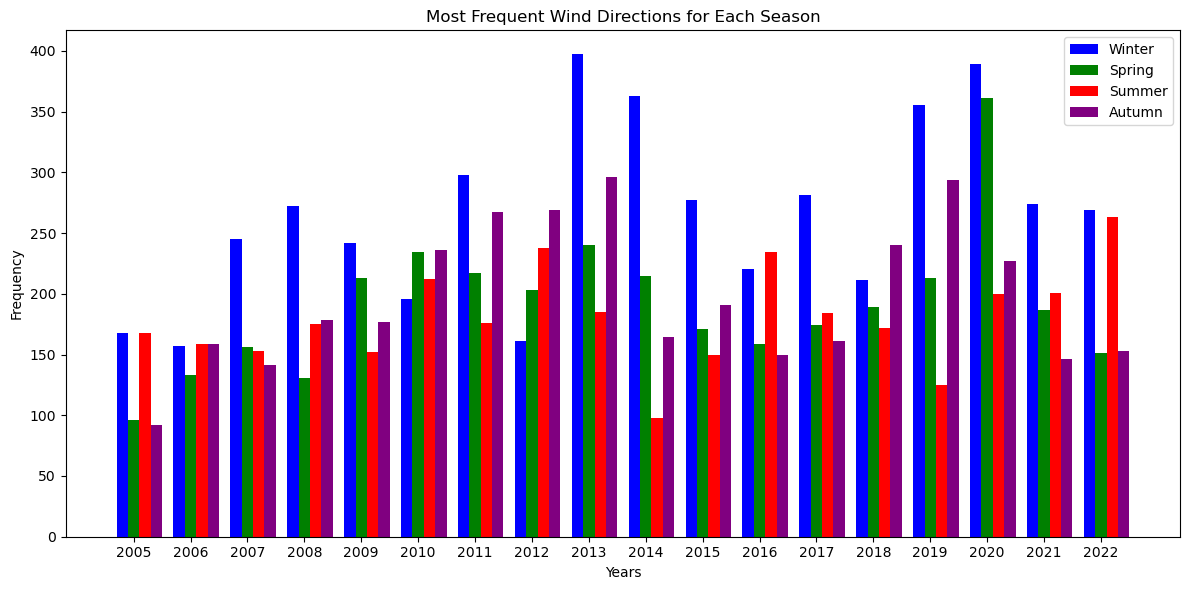

Most frequent wind direction for Winter: ['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
Average wind direction for Winter: S
Most frequent wind direction for Spring: ['S' 'S' 'S' 'S' 'S' 'SW' 'S' 'S']
Average wind direction for Spring: S
Most frequent wind direction for Summer: ['N' 'N' 'N' 'NE' 'NE' 'W' 'NE' 'N']
Average wind direction for Summer: N
Most frequent wind direction for Autumn: ['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
Average wind direction for Autumn: S


In [7]:
years = range(2005, 2023)
bar_width = 0.2
colors = ["blue", "green", "red", "purple"]

plt.figure(figsize=(12, 6))

for i, season in enumerate(seasons):
    freq_values = []
    for year in years:
        season_data = data[(data["Season"] == season) &
                           (data["date"].dt.year == year)]
        season_wind_data = season_data[wind_columns].applymap(
            lambda x: get_cardinal_direction(x))
        season_wind_grouped = season_wind_data.apply(pd.Series.value_counts)
        season_wind_grouped.fillna(0, inplace=True)

        freq_values.append(
            season_wind_grouped.loc[season_most_frequent[season]].sum(axis=1).max())

    x = np.arange(len(years)) + bar_width * i
    plt.bar(x, freq_values, width=bar_width, label=season, color=colors[i])

plt.xticks(np.arange(len(years)) + bar_width, years)
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.title("Most Frequent Wind Directions for Each Season")
plt.legend()
plt.tight_layout()
plt.show()
for season in seasons:
    print(
        f"Most frequent wind direction for {season}: {season_most_frequent[season]}")
    print(f"Average wind direction for {season}: {season_average[season]}")


As the conclusion,southerly winds are prevailing through the year, since it is the most frequent wind directions in Winter, Spring and Autumn.
As the exclusion - Astana summers, where mostly northerly winds are dominant.

Как вывод, в течение всего года преобладают южные ветры, так как именно они наиболее часто встречаются зимой, весной и осенью.
Исключение - лето в Астане, где преобладают северные ветры.